<a href="https://colab.research.google.com/github/ykykyk112/machine_learning/blob/main/sklearn_exercise/Dimentionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def make_ndarray(target_list, each_size) :
    # 784 means bitmap size
    data = np.empty((len(target_list)*each_size, 784))
    target = np.empty((len(target_list)*each_size))
    for label, filename in enumerate(target_list) :
        npy = np.load('/content/drive/MyDrive/Colab_Notebooks/quickdraw/{}.npy'.format(filename))
        tmp = np.arange(npy.shape[0])
        idx = np.random.choice(tmp, each_size, replace=False)
        data[label*each_size:(label+1)*each_size] = npy[idx]
        target[label*each_size:(label+1)*each_size] = label
        print('{} is Complete'.format(filename))
    s_idx = np.arange(target.shape[0])
    np.random.shuffle(s_idx)
    data = data[s_idx]
    target = target[s_idx]
    print('result shape : {0} & {1}'.format(data.shape, target.shape))
    return data, target

target_list = ['ant', 'bicycle', 'bird', 'butterfly', 'camel', 'clock', 'cow', 'diamond']
data, target = make_ndarray(target_list=target_list, each_size=10000)

ant is Complete
bicycle is Complete
bird is Complete
butterfly is Complete
camel is Complete
clock is Complete
cow is Complete
diamond is Complete
result shape : (80000, 784) & (80000,)


In [5]:
X = data
y = target

In [6]:
X.shape

(80000, 784)

In [7]:
pca = PCA(n_components=0.95, random_state=42)

In [8]:
sample = X[0].reshape(28, 28)

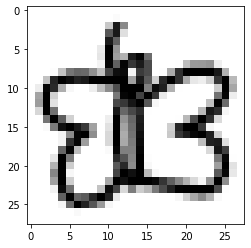

In [9]:
plt.imshow(sample, cmap = 'binary')

In [10]:
X_reduced = pca.fit_transform(X)

In [11]:
X_reduced.shape

(80000, 275)

In [12]:
pca.explained_variance_ratio_

array([0.07424511, 0.03790804, 0.03214149, 0.0275626 , 0.02586783,
       0.02220671, 0.01841027, 0.01682793, 0.01474773, 0.01455514,
       0.01320896, 0.01277281, 0.01185022, 0.01149188, 0.01131681,
       0.01057391, 0.01039742, 0.00999683, 0.00904976, 0.00903741,
       0.00883888, 0.00853433, 0.00838458, 0.0079335 , 0.00782814,
       0.00765222, 0.00755006, 0.00730024, 0.00720608, 0.00690041,
       0.00680935, 0.00676251, 0.00642224, 0.0063705 , 0.00622042,
       0.00619908, 0.0061103 , 0.00599201, 0.00580654, 0.00576341,
       0.00559992, 0.00550672, 0.0054462 , 0.00534801, 0.00529241,
       0.00522316, 0.00511057, 0.00494541, 0.00486019, 0.00480941,
       0.00466674, 0.00457141, 0.00453177, 0.00443146, 0.00440803,
       0.00437676, 0.00432298, 0.00424081, 0.00412684, 0.00409695,
       0.00403141, 0.00392754, 0.00389031, 0.00382767, 0.00378516,
       0.00372303, 0.00369223, 0.00361923, 0.00360294, 0.00351381,
       0.00348723, 0.00342687, 0.00339741, 0.00336334, 0.00329

In [13]:
pca.explained_variance_ratio_.shape

(275,)

In [14]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.07424511, 0.11215315, 0.14429464, 0.17185724, 0.19772507,
       0.21993178, 0.23834205, 0.25516999, 0.26991772, 0.28447286,
       0.29768182, 0.31045464, 0.32230486, 0.33379674, 0.34511355,
       0.35568745, 0.36608488, 0.3760817 , 0.38513146, 0.39416888,
       0.40300776, 0.41154209, 0.41992667, 0.42786017, 0.43568831,
       0.44334053, 0.4508906 , 0.45819083, 0.46539691, 0.47229732,
       0.47910668, 0.48586919, 0.49229142, 0.49866192, 0.50488234,
       0.51108143, 0.51719173, 0.52318374, 0.52899028, 0.53475369,
       0.54035362, 0.54586033, 0.55130653, 0.55665454, 0.56194695,
       0.56717011, 0.57228068, 0.57722609, 0.58208628, 0.58689568,
       0.59156243, 0.59613383, 0.6006656 , 0.60509706, 0.60950509,
       0.61388185, 0.61820483, 0.62244564, 0.62657249, 0.63066943,
       0.63470085, 0.63862839, 0.6425187 , 0.64634637, 0.65013153,
       0.65385456, 0.65754679, 0.66116602, 0.66476896, 0.66828277,
       0.67177001, 0.67519688, 0.67859429, 0.68195763, 0.68525

In [15]:
x_axis = np.linspace(0, cumsum.shape[0], cumsum.shape[0])
y_axis = cumsum
x_axis.shape

(275,)

Text(0.5, 1.0, 'Variance change trend')

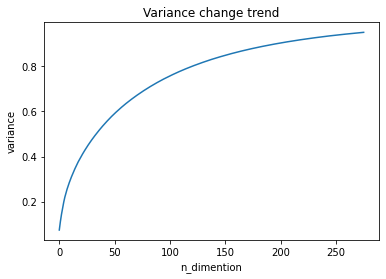

In [16]:
plt.plot(x_axis, y_axis)
plt.xlabel('n_dimention')
plt.ylabel('variance')
plt.title('Variance change trend')

In [17]:
pca.singular_values_

array([166963.00290055, 119303.1624381 , 109854.86741067, 101729.38539148,
        98552.19250901,  91312.12298714,  83141.21967209,  79488.02328044,
        74413.01413081,  73925.55118066,  70423.99227714,  69251.56363496,
        66703.64403162,  65687.35425534,  65185.09814932,  63009.21486801,
        62481.16851058,  61265.69836511,  58291.45093593,  58251.66881843,
        57608.29007246,  56607.1272236 ,  56108.27260939,  54578.1532272 ,
        54214.50667433,  53601.89071614,  53242.88270092,  52354.58650678,
        52015.8577086 ,  50900.71564791,  50563.74959056,  50389.52049488,
        49105.42737649,  48907.21491952,  48327.71987134,  48244.75443258,
        47898.01711369,  47432.12154836,  46692.28515073,  46518.55465555,
        45854.01760555,  45470.80668165,  45220.25694774,  44810.77151949,
        44577.2265259 ,  44284.61132923,  43804.73852074,  43091.08026811,
        42718.18520859,  42494.43875844,  41859.416191  ,  41429.65039431,
        41249.62735352,  

In [18]:
X_recovered = pca.inverse_transform(X_reduced)

In [19]:
sample_origin = X[:4].reshape(-1, 28, 28)
sample_recovered = X_recovered[:4].reshape(-1, 28, 28)

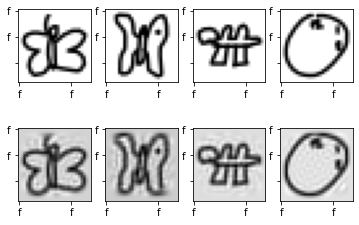

In [20]:
def plot_origin_recovered(origin, recovered) :
    plot_image = np.append(origin, recovered, axis=0)
    row = 2
    col = 4
    fig = plt.figure()
    for i in range(row*col) :
        sub = fig.add_subplot(row, col, i+1)
        sub.set_xticklabels('off')
        sub.set_yticklabels('off')
        sub.imshow(plot_image[i], cmap='binary')
    fig.show()

plot_origin_recovered(sample_origin, sample_recovered)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.2, random_state = 42)
X_train_recovered, X_test_recovered, y_train, y_test = train_test_split(X_recovered, y, test_size = 0.2, random_state = 42)

In [ ]:
print(X.shape)
print(X_reduced.shape)
print(X_recovered.shape)

(80000, 784)
(80000, 275)
(80000, 784)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
origin_clf = RandomForestClassifier(random_state = 42, verbose = 2)
origin_clf.fit(X_train, y_train)
origin_clf.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


0.7926875

In [ ]:
reduct_clf = RandomForestClassifier(random_state=42, verbose=2)
reduct_clf.fit(X_train_reduced, y_train)
reduct_clf.score(X_test_reduced, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


0.7645625

In [ ]:
recover_clf = RandomForestClassifier(random_state=42, verbose=2)
recover_clf.fit(X_train_recovered, y_train)
recover_clf.score(X_test_recovered, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


0.771

In [ ]:
np.empty((100,)).shape

(100,)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC

# estimators = [rnd, dt, kernel_svc, ext]
def score_prepare_variance(X, y, estimators) :
    n_variance = np.linspace(0.1, 1, 100)
    score_p_variance = np.empty((100, len(estimators)))
    n_class = np.empty((100, ), dtype=int)
    for i, variance in enumerate(n_variance) :
        pca_v = PCA(n_components=variance)
        X_reduced = pca_v.fit_transform(X)
        n_class[i] = pca_v.n_components_
        X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.2, random_state = 42)
        print('{0}/{1} epoch, dimention reduced to {2}'.format(i+1, len(n_variance), n_class[i]))
        for j, clf in enumerate(estimators) :
            clf.fit(X_train, y_train)
            score_p_variance[i][j] = clf.score(X_test, y_test)
            print('{0}/{1} fitting'.format(j+1, len(estimators)))
    return score_p_variance, n_class

rnd_clf = RandomForestClassifier(n_estimators=50, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
svm_clf = SVC(kernel = 'linear', random_state=42)
ext_clf = ExtraTreesClassifier(n_estimators = 50, random_state=42)

estimators = [rnd_clf, dt_clf, svm_clf, ext_clf]

score_each_clf, n_class = score_prepare_variance(X, y, estimators=estimators)

In [41]:
import time

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC

# running time prepare variance

def get_time_score(X, y, clf) :
    run_time = np.empty((33, ))
    score = np.empty((33, ))
    n_component = np.empty((33, ))
    n_variance = np.linspace(0.03, 0.99, 33)
    for index, variance in enumerate(n_variance) :
        pca_t = PCA(n_components = variance)
        X_reduced = pca_t.fit_transform(X)
        n_component[index] = pca_t.n_components_
        X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.2, random_state = 42)
        start = time.time()
        clf.fit(X_train, y_train)
        run_time[index] = (time.time()-start)
        score[index] = clf.score(X_test, y_test)
        print('{0}/{1} training complete'.format(index+1, len(n_variance)))
    return run_time, score, n_component

time_per_variance, score_per_variance, component_per_variance = get_time_score(X, y, DecisionTreeClassifier(random_state = 42))

1/33 training complete
2/33 training complete
3/33 training complete
4/33 training complete
5/33 training complete
6/33 training complete
7/33 training complete
8/33 training complete
9/33 training complete
10/33 training complete
11/33 training complete
12/33 training complete
13/33 training complete
14/33 training complete
15/33 training complete
16/33 training complete
17/33 training complete
18/33 training complete
19/33 training complete
20/33 training complete
21/33 training complete
22/33 training complete
23/33 training complete
24/33 training complete
25/33 training complete
26/33 training complete
27/33 training complete
28/33 training complete
29/33 training complete
30/33 training complete
31/33 training complete
32/33 training complete
33/33 training complete


In [54]:
time_per_variance = time_per_variance/60
time_per_variance

array([0.00462149, 0.00463045, 0.00652605, 0.00924858, 0.01203124,
       0.01448911, 0.01704706, 0.02269825, 0.02896188, 0.03517847,
       0.04112906, 0.05216148, 0.06366662, 0.07665238, 0.08766003,
       0.10535075, 0.12159548, 0.13900448, 0.16766676, 0.18435257,
       0.21665568, 0.24937445, 0.28921619, 0.33064408, 0.4379673 ,
       0.4356438 , 0.50097172, 0.58670056, 0.68687368, 0.81462281,
       0.98805428, 1.28359649, 1.88488047])

In [43]:
score_per_variance

array([0.2783125, 0.2783125, 0.3509375, 0.491375 , 0.528125 , 0.5515625,
       0.586625 , 0.62275  , 0.6401875, 0.6513125, 0.6560625, 0.6531875,
       0.6488125, 0.6485   , 0.648875 , 0.6485   , 0.6455625, 0.646875 ,
       0.647    , 0.639875 , 0.63925  , 0.6391875, 0.634625 , 0.63175  ,
       0.6293125, 0.631375 , 0.6314375, 0.6253125, 0.6226875, 0.6231875,
       0.620875 , 0.6145625, 0.613375 ])

In [44]:
component_per_variance

array([  1.,   1.,   2.,   3.,   4.,   5.,   6.,   8.,  10.,  12.,  14.,
        17.,  20.,  24.,  27.,  32.,  36.,  41.,  47.,  53.,  60.,  68.,
        77.,  87.,  98., 111., 127., 145., 168., 197., 237., 299., 430.])

In [45]:
pca = PCA(n_components=0.95)
X_b = pca.fit_transform(X)

In [40]:
pca.n_components

0.95

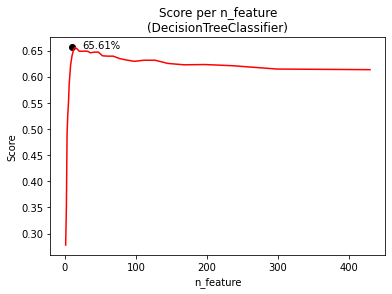

In [103]:
def plot_score_variance(score, clf):
    best_score_feature = np.argmax(score)
    plt.scatter(best_score_feature, score[best_score_feature], c = 'k')
    plt.text(best_score_feature+15, score[best_score_feature]-0.005, '{:.2f}'.format(score[best_score_feature]*100)+'%', color='k', horizontalalignment = 'left',verticalalignment='bottom')
    plt.plot(component_per_variance, score, '-r')
    plt.title('Score per n_feature\n({})'.format(clf))
    plt.xlabel('n_feature')
    plt.ylabel('Score')
    
plot_score_variance(score_per_variance, 'DecisionTreeClassifier')

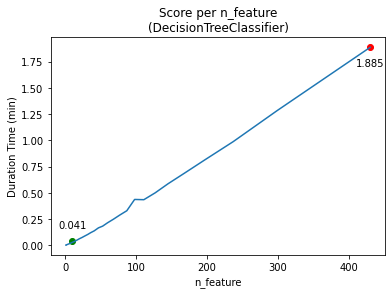

In [105]:
def plot_time_variance(time_per_variance, clf) :
    plt.plot(component_per_variance, time_per_variance)
    plt.scatter(best_score_feature, time_per_variance[best_score_feature], c = 'g')
    plt.text(best_score_feature, time_per_variance[best_score_feature]+0.1, '{:.3f}'.format(time_per_variance[best_score_feature]), color='k', horizontalalignment = 'center',verticalalignment='bottom')
    plt.scatter(component_per_variance[32], time_per_variance[32], c = 'r')
    plt.text(component_per_variance[32], time_per_variance[32]-0.1, '{:.3f}'.format(time_per_variance[32]), color='k', horizontalalignment = 'center',verticalalignment='top')
    plt.title('Score per n_feature\n({})'.format(clf))
    plt.xlabel('n_feature')
    plt.ylabel('Duration Time (min)')

plot_time_variance(time_per_variance, 'DecisionTreeClassifier')

Text(0, 0.5, 'n_feature')

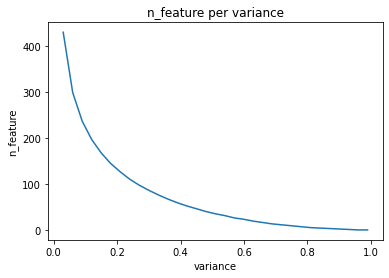

In [106]:
plt.plot(n_variance, np.flip(component_per_variance))
plt.title('n_feature per variance')
plt.xlabel('variance')
plt.ylabel('n_feature')

In [107]:
rnd_time_per_variance, rnd_score_per_variance, rnd_component_per_variance = get_time_score(X, y, RandomForestClassifier(random_state = 42))

1/33 training complete
2/33 training complete
3/33 training complete
4/33 training complete
5/33 training complete
6/33 training complete
7/33 training complete
8/33 training complete
9/33 training complete
10/33 training complete
11/33 training complete
12/33 training complete
13/33 training complete
14/33 training complete
15/33 training complete
16/33 training complete
17/33 training complete
18/33 training complete
19/33 training complete
20/33 training complete
21/33 training complete
22/33 training complete
23/33 training complete
24/33 training complete
25/33 training complete
26/33 training complete
27/33 training complete
28/33 training complete
29/33 training complete
30/33 training complete
31/33 training complete
32/33 training complete
33/33 training complete


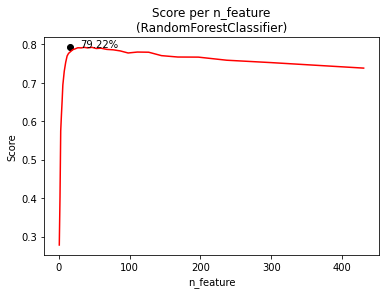

In [108]:
plot_score_variance(rnd_score_per_variance, 'RandomForestClassifier')

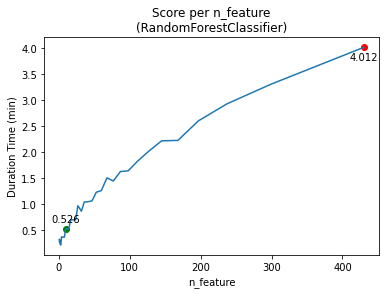

In [111]:
rnd_time_per_variance = rnd_time_per_variance/60
plot_time_variance(rnd_time_per_variance, 'RandomForestClassifier')

In [110]:
from sklearn.svm import LinearSVC
svm_time_per_variance, svm_score_per_variance, svm_component_per_variance = get_time_score(X, y, LinearSVC(random_state = 42))

KeyboardInterrupt: ignored